# Passo a Passo para o Algoritmo de Random Forest

## 1. Preparação dos Dados
   - **Importe a base de dados**: Carregue o conjunto de dados que deseja usar. Certifique-se de que está no formato correto e que todas as variáveis estão disponíveis.
   - **Divida os dados**: Separe o conjunto de dados em variáveis de entrada (X) e variável alvo (y).
   - **Pré-processamento dos dados**:
      - Trate dados faltantes, se houver.
      - Converta variáveis categóricas em variáveis numéricas, se necessário.
      - Escale os dados, caso as variáveis tenham escalas muito diferentes (opcional para RF, pois ele não é sensível à escala).

## 2. Divisão do Conjunto de Treinamento e Teste
   - Divida os dados em conjuntos de treinamento e teste. Uma proporção comum é 80% para treinamento e 20% para teste.

## 3. Importação das Bibliotecas Necessárias
   - **Importe o RandomForestClassifier ou RandomForestRegressor** da biblioteca `sklearn.ensemble`, dependendo do problema:
      - `RandomForestClassifier` para problemas de classificação.
      - `RandomForestRegressor` para problemas de regressão.

## 4. Inicialização do Modelo
   - Inicialize o modelo com os parâmetros desejados:
      - **n_estimators**: número de árvores na floresta. Um valor típico é entre 100 e 500.
      - **max_depth**: profundidade máxima das árvores (opcional). Pode ser ajustado para evitar overfitting.
      - **random_state**: para garantir a reprodutibilidade dos resultados.

## 5. Treinamento do Modelo
   - **Treine o modelo** usando o conjunto de treinamento, ajustando-o aos dados (usando `model.fit(X_train, y_train)`).

## 6. Realize Previsões
   - **Previsões no Conjunto de Teste**: Após o treinamento, use o modelo para prever o conjunto de teste com `model.predict(X_test)`.

## 7. Avaliação do Modelo
   - **Métricas de Avaliação**: Use métricas de avaliação adequadas ao problema:
      - Para **classificação**: `accuracy`, `precision`, `recall`, e `f1-score`.
      - Para **regressão**: `mean_squared_error`, `mean_absolute_error` ou `r2_score`.
   - Avalie o desempenho do modelo com o conjunto de teste e compare com o conjunto de treinamento para verificar a presença de overfitting.

## 8. Ajuste de Hiperparâmetros (Opcional)
   - Use técnicas como `GridSearchCV` ou `RandomizedSearchCV` para encontrar a combinação ideal de hiperparâmetros.
   - Ajuste parâmetros como `n_estimators`, `max_depth`, `min_samples_split`, entre outros, para otimizar o desempenho.

## 9. Interpretação e Importância das Variáveis
   - **Interpretação**: Examine a importância das variáveis para entender quais são mais relevantes para o modelo.
   - **feature_importances_**: Utilize `model.feature_importances_` para verificar a importância de cada variável de entrada no modelo final.

## 10. Implementação e Uso em Produção (Opcional)


# Explicação Simples do Random Forest

Random Forest é um algoritmo de aprendizado de máquina que faz previsões combinando o poder de várias árvores de decisão. Imagine que você quer fazer uma escolha difícil, como qual produto comprar, e para isso, você pergunta a várias pessoas que têm opiniões diferentes. No final, você escolhe o que a maioria das pessoas recomendou (votação) ou a média das respostas.

No Random Forest, o processo é semelhante: o algoritmo cria várias árvores de decisão usando partes aleatórias dos dados e faz uma "votação" entre as árvores para decidir a resposta final. Como usa muitas árvores e considera as respostas de todas, o Random Forest costuma ser mais preciso e confiável que uma única árvore de decisão, além de ser menos influenciado por erros nos dados. É muito útil tanto para classificação (decidir entre categorias) quanto para regressão (prever valores numéricos).


# Implementar em python o Random Forest

### Explicação do Código para Previsão de Preços com Random Forest

Este código implementa um modelo de **Random Forest Regressor** para prever os preços de fechamento ajustados de ativos financeiros, utilizando dados históricos dos últimos dois anos de empresas como AAPL, MSFT, e GOOGL. Abaixo estão as etapas do processo:

1. **Definição e Download dos Dados**: 
   - Definimos os ativos a serem analisados (`tickers`), o período de tempo (`start_date` e `end_date`), e baixamos os dados utilizando a biblioteca `yfinance`. Os dados são salvos em um arquivo CSV para uso posterior e carregados de volta para o DataFrame `data`.

2. **Visualização dos Dados**:
   - Um gráfico é criado para visualizar o **preço de fechamento ajustado** dos ativos ao longo do tempo. Isso ajuda a entender as tendências de preço antes de aplicar o modelo de previsão.

3. **Preparação dos Dados para o Modelo**:
   - Focamos no ativo AAPL e extraímos a coluna de **preço de fechamento ajustado**.
   - Criamos uma variável de **target** (objetivo), que representa o preço de fechamento do dia seguinte. A linha com valor `NaN` é removida, pois não terá um valor futuro para prever.
   - **Variáveis de entrada com atraso (lags)** são criadas para considerar os preços dos últimos 30 dias como preditores, formando uma janela deslizante de 30 dias.

4. **Divisão em Conjunto de Treinamento e Teste**:
   - Dividimos o conjunto de dados em variáveis de entrada (`X`) e a variável alvo (`y`). Em seguida, fazemos uma divisão em dados de **treinamento** e **teste** (80% treino e 20% teste).

5. **Criação e Treinamento do Modelo Random Forest**:
   - Utilizamos o **Random Forest Regressor** como modelo de aprendizado, definindo `n_estimators=100` (ou seja, o número de árvores) e `random_state=42` para garantir a reprodutibilidade.
   - O modelo é treinado com os dados de treinamento (`X_train` e `y_train`).

6. **Previsão e Avaliação do Modelo**:
   - Fazemos previsões no conjunto de teste (`X_test`) e calculamos o **Mean Squared Error (MSE)** para avaliar a precisão do modelo. Um valor menor de MSE indica maior precisão.

7. **Comparação de Previsões e Valores Reais**:
   - Exibimos uma tabela com os valores reais e as previsões para os primeiros dias do conjunto de teste.
   - Um gráfico é gerado para visualizar a comparação entre os valores reais e previstos, permitindo uma análise visual da performance do modelo.

Este código oferece uma abordagem prática para prever preços de ativos financeiros, aproveitando a técnica de Random Forest para criar um modelo robusto e que leva em conta múltiplos fatores históricos.


In [4]:
# Importar bibliotecas necessárias
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

[*********************100%***********************]  3 of 3 completed


Dados salvos em ativos_yahoo_finance.csv
Dados carregados com sucesso.
Ticker                           MSFT                                      \
Price                            Open        High         Low       Close   
Date                                                                        
2021-01-04 00:00:00+00:00  222.529999  223.000000  214.809998  217.690002   
2021-01-05 00:00:00+00:00  217.259995  218.520004  215.699997  217.899994   
2021-01-06 00:00:00+00:00  212.169998  216.490005  211.940002  212.250000   
2021-01-07 00:00:00+00:00  214.039993  219.339996  213.710007  218.289993   
2021-01-08 00:00:00+00:00  218.679993  220.580002  217.029999  219.619995   

Ticker                                                 AAPL              \
Price                       Adj Close    Volume        Open        High   
Date                                                                      
2021-01-04 00:00:00+00:00  210.844269  37130100  133.520004  133.610001   
2021-01-05 0

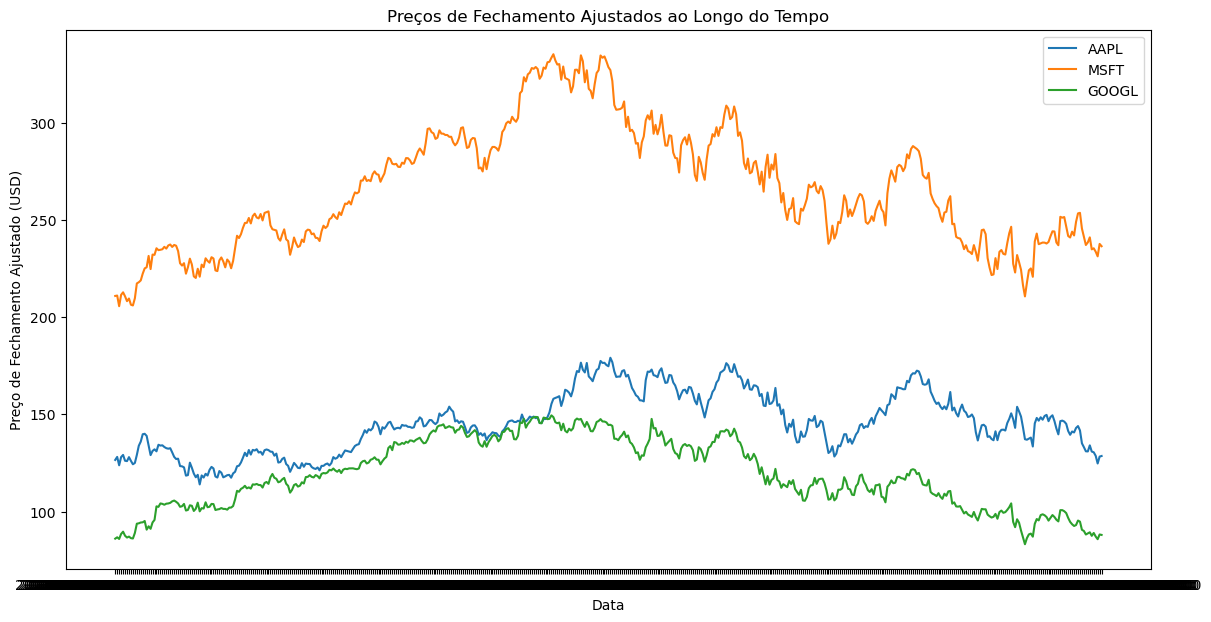

Mean Squared Error (MSE) no conjunto de teste: 27.515162790121735
Comparação entre valores reais e previstos:
                                 Real    Previsão
Date                                             
2022-08-16 00:00:00+00:00  172.447479  171.142768
2022-08-17 00:00:00+00:00  172.052307  171.195276
2022-08-18 00:00:00+00:00  169.453964  172.543872
2022-08-19 00:00:00+00:00  165.551575  172.497452
2022-08-22 00:00:00+00:00  165.215652  171.049377
2022-08-23 00:00:00+00:00  165.512039  165.688292
2022-08-24 00:00:00+00:00  167.981918  164.246590
2022-08-25 00:00:00+00:00  161.649139  165.089647
2022-08-26 00:00:00+00:00  159.436111  171.494825
2022-08-29 00:00:00+00:00  156.995880  163.432490


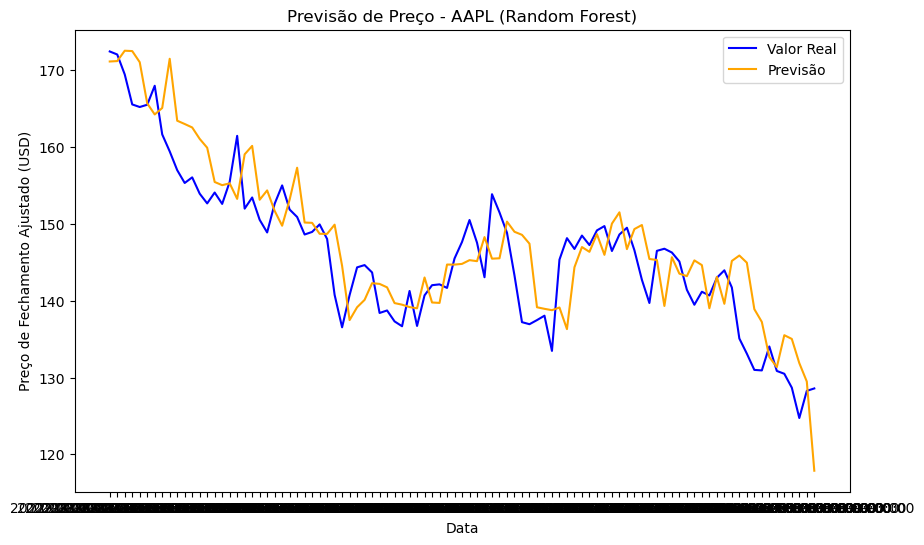

In [5]:
# Defina os tickers dos ativos
tickers = ['AAPL', 'MSFT', 'GOOGL']

# Defina o período de 2 anos
start_date = "2021-01-01"
end_date = "2023-01-01"

# Baixe os dados
data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')

# Salve os dados em um arquivo CSV
data.to_csv("ativos_yahoo_finance.csv")
print("Dados salvos em ativos_yahoo_finance.csv")

# Carregar dados do arquivo CSV para garantir que foram salvos e carregados corretamente
data = pd.read_csv("ativos_yahoo_finance.csv", header=[0, 1], index_col=0)

# Verificar se os dados foram carregados corretamente
print("Dados carregados com sucesso.")
print(data.head())

# Gráfico de Preços de Fechamento Ajustados para Cada Ativo
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(data.index, data[(ticker, 'Adj Close')], label=ticker)
plt.title("Preços de Fechamento Ajustados ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Preço de Fechamento Ajustado (USD)")
plt.legend()
plt.show()

# Implementação do Random Forest para Predição de Preço (Exemplo com 'AAPL')
ticker = 'AAPL'
data_ticker = data[(ticker, 'Adj Close')].dropna().to_frame(name='Adj Close')

# Criar variável de target (preço do próximo dia)
data_ticker['Target'] = data_ticker['Adj Close'].shift(-1)
data_ticker = data_ticker.dropna()

# Criar variáveis de entrada com atraso (lags)
window_size = 30  # Janela de 30 dias
for i in range(1, window_size + 1):
    data_ticker[f'Lag_{i}'] = data_ticker['Adj Close'].shift(i)
data_ticker = data_ticker.dropna()

# Dividir dados em variáveis de entrada (X) e variável alvo (y)
X = data_ticker.drop(columns=['Adj Close', 'Target'])
y = data_ticker['Target']

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Criar e treinar o modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) no conjunto de teste: {mse}")

# Exibir previsões versus valores reais
predicoes_df = pd.DataFrame({'Real': y_test, 'Previsão': y_pred})
print("Comparação entre valores reais e previstos:")
print(predicoes_df.head(10))

# Gráfico de comparação entre valores reais e previstos
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label="Valor Real", color="blue")
plt.plot(y_test.index, y_pred, label="Previsão", color="orange")
plt.title(f"Previsão de Preço - {ticker} (Random Forest)")
plt.xlabel("Data")
plt.ylabel("Preço de Fechamento Ajustado (USD)")
plt.legend()
plt.show()


# Avaliação dos Resultados do Modelo Random Forest

Nesta análise, utilizamos um modelo de Random Forest para prever os preços de fechamento ajustados da ação AAPL (Apple) com base em dados históricos e variáveis de atraso.

#### Mean Squared Error (MSE)
O erro quadrático médio (MSE) obtido para o conjunto de teste foi aproximadamente **27,52**. O MSE mede a diferença média ao quadrado entre os valores reais e previstos; valores mais baixos indicam uma maior precisão do modelo. Um MSE de 27,52 sugere que o modelo tem uma precisão moderada, apresentando alguma variação entre os preços previstos e os reais.

#### Comparação entre Preços Reais e Previstos
A tabela de comparação entre preços reais e previstos mostra que o modelo consegue captar a tendência geral dos movimentos de preço, mas não consegue prever com precisão as flutuações diárias. Isso é esperado em séries temporais, onde pequenas mudanças de tendência podem causar discrepâncias nas previsões.

#### Gráfico de Preços Reais vs. Previstos
O gráfico de linhas comparando preços reais e previstos para a AAPL demonstra visualmente o desempenho do modelo:
- **Alinhamento de Tendências**: O modelo acompanha a tendência geral de queda no preço das ações da AAPL ao longo do período de teste, indicando que consegue captar a direção geral do mercado.
- **Pontos de Desvio**: Há alguns pontos onde os preços previstos se desviam significativamente dos preços reais. Isso pode ocorrer devido a mudanças bruscas no mercado ou limitações na complexidade do modelo.

#### Conclusão
O modelo de Random Forest oferece uma aproximação razoável dos movimentos da ação, capturando as tendências mais amplas, mas mostrando precisão limitada nas previsões diárias exatas. Melhorias no modelo poderiam incluir ajustes de hiperparâmetros, aumento da complexidade das variáveis ou experimentação com modelos mais avançados para melhorar a precisão. No entanto, este modelo serve como uma base sólida para entender as tendências e padrões de movimento de preços.
